In [2]:
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt

import sys 
sys.path.append('..')
from tools.amputation import produce_NA
from tools import utils, amputation
from alternative_imputers import muzellec_imputers
from tools.utils import colors
from tqdm import tqdm

plt.style.use(utils.plot_style)

from tools import imputation

In [3]:
p_miss = [0.10]#, 0.40, 0.7]
modes = ['mae']#, 'bayesianRidge'],
mechas = ['MCAR', 'MAR', 'MNAR']
imputer_names = ['mf', 'mean', 'ice', 'knn', 'mice', 'miceforest']#'linearRR']

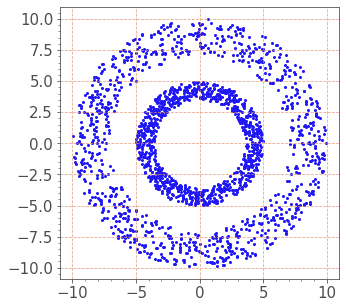

In [4]:
import matplotlib.pyplot as plt
import math
import random
fig, ax = plt.subplots(figsize=(5,5))
x = []
y = []
R = 10
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/2,R)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

    
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/8,R/4)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

dataset = np.vstack((x,y)).T
    
plt.scatter(x,y)
plt.show()



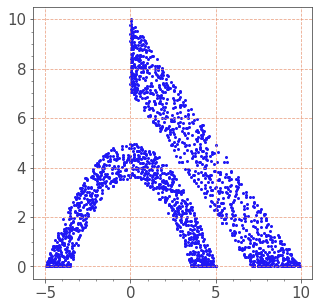

In [38]:
import matplotlib.pyplot as plt
import math
import random
fig, ax = plt.subplots(figsize=(5,5))
x = []
y = []
R = 10

for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/2,R)
    x.append(math.sqrt(r*R)*math.cos(theta)**2)
    y.append(math.sqrt(r*R)*math.sin(theta)**2)

    
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/8,R/4)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta)**2)




dataset_2 = np.vstack((x,y)).T
    
plt.scatter(x,y)
plt.show()

In [39]:
X_full, X_miss, mask, imp = imputation.impute(dataset_2, p_miss, 'MAR', 'mean')

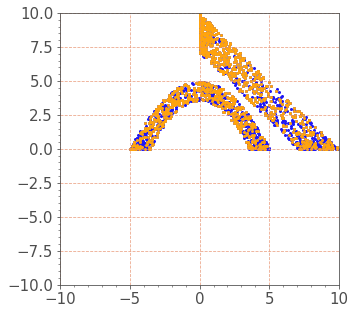

In [40]:
fig, ax = plt.subplots(figsize=(5,5))
dataset_2 = np.vstack((x,y)).T
    
plt.scatter(dataset_2[:, 0],dataset_2[:, 1])
plt.scatter(X_miss[:, 0],X_miss[:, 1])
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.show()

In [41]:
# imputer_names = ['mice', 'knn', 'ice', 'miceforest', 'sinkhorn', 'mean', 'linearRR', 'midas']
# p_miss = 0.4
# mech = "MAR"
# ncols = len(mechas)
# datasets_miss_tot = []
# imps_tot = []

# X_miss_t = produce_NA(dataset, p_miss = p_miss, p_obs = 0.1, mecha = mech)

# for imputer_name in imputer_names:
#     datasets_miss = []
#     imps = []
#     for mech in mechas:
#         X_full, X_miss, mask, imp = imputation.impute(dataset, p_miss, mech, imputer_name, X_miss_t = X_miss_t)
#         datasets_miss.append(X_miss)
#         imps.append(imp)
#     datasets_miss_tot.append(datasets_miss)
#     imps_tot.append(imps)

In [44]:
imputer_names = ['mean', 'knn', 'mice', 'miceforest']#, 'sinkhorn', 'mean', 'linearRR', 'midas']
p_miss = 0.4
mech = "MAR"
ncols = len(imputer_names)
datasets_miss = []
imps = []
masks =[]
X_miss_t = produce_NA(X_full, p_miss = p_miss, p_obs = 0.1, mecha = mech)
for imputer_name in imputer_names:    
    X_full, X_miss, mask, imp = imputation.impute(dataset_2, p_miss, mech, imputer_name, X_miss_t=X_miss_t)
    datasets_miss.append(X_miss)
    imps.append(imp)
    masks.append(mask)

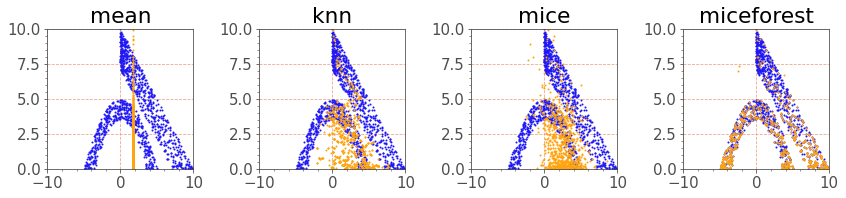

In [46]:
ncols = len(imputer_names)
fig, axs = plt.subplots(ncols=ncols, nrows = 1, figsize=(3*ncols, 3))
for i in range(ncols):
    # st = fig.title(f"Imputer: {imputer_names[i]}", fontsize="x-large")

    axs[i].plot(datasets_miss[i][:,0],datasets_miss[i][:,1], 'o')
    axs[i].plot(imps[i][np.where(masks[1].numpy())[0]][:,0],imps[i][np.where(masks[1].numpy())[0]][:,1], 'o')
    axs[i].set_title(f"{imputer_names[i]}", fontsize="x-large")
    # st.set_y(0.95)
    # fig.subplots_adjust(top=0.85)
    axs[i].set_xlim(-10,10)
    axs[i].set_ylim(0,10)
    plt.savefig(f"figures/{mech}, {np.array(p_miss)*100} %, impute: {imputer_name}22.png", dpi=200)
    plt.tight_layout()

In [11]:
pd.DataFrame(dataset).corr()

,0,1
0,1.000000,0.014039
1,0.014039,1.000000


In [24]:
pd.DataFrame(imps_tot[4][2]).corr()

,0,1
0,1.00000,0.01292
1,0.01292,1.00000
